<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading data</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Calculations-and-adding-results-to-the-table" data-toc-modified-id="Calculations-and-adding-results-to-the-table-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculations and adding results to the table</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Analyzing-observations-by-area,-price,-number-of-rooms,-ceiling-height" data-toc-modified-id="Analyzing-observations-by-area,-price,-number-of-rooms,-ceiling-height-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Analyzing observations by area, price, number of rooms, ceiling height</a></span></li><li><span><a href="#Analyzing-observations-according-to-when-apartments-sold" data-toc-modified-id="Analyzing-observations-according-to-when-apartments-sold-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Analyzing observations according to when apartments sold</a></span></li><li><span><a href="#Factor-analysis" data-toc-modified-id="Factor-analysis-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Factor analysis</a></span></li><li><span><a href="#Top-10-regions-by-number-of-ads" data-toc-modified-id="Top-10-regions-by-number-of-ads-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Top 10 regions by number of ads</a></span></li><li><span><a href="#Apartments-in-the-center" data-toc-modified-id="Apartments-in-the-center-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Apartments in the center</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Apartments for sale research

Yandex Real Estate data - an archive of announcements about apartments for sale in Saint-Petersburg and nearby settlements.

**Objective**: determination of the parameters that determine the market value of real estate properties.

This will help to create an automated system: it will track anomalies and fraudulent activity. 

Two types of data are available for each property for sale. The first is entered by the user, and the second is automatically determined based on map data. For example, the distance to the center, the airport, the nearest park and water.

## Data description
* `airports_nearest` — distance to the nearest airport in meters (m)
* `balcony` — number of balconies
* `ceiling_height` — ceiling height (m)
* `cityCenters_nearest` — distance to the city center in meters (m)
* `days_exposition` — how many days the listing was posted (from posting to removal)
* `first_day_exposition` — date of exposure
* `floor` — apartment floor
* `floors_total` — total number of floors in the building
* `is_apartment` — apartment (Boolean type)
* `kitchen_area` — kitchen area in square meters (m²)
* `last_price` — price at the time of withdrawal from publication
* `living_area` — living area in square meters (m²)
* `locality_name` - name of the locality
* `open_plan` - free layout (boolean type)
* `parks_around3000` - number of parks within 3 km radius
* `parks_nearest` - distance to the nearest park (m)
* `ponds_around3000` - number of ponds within 3 km radius
* `ponds_nearest` - distance to the nearest pond (m)
* `rooms` - number of rooms
* `studio` - studio apartment (Boolean type)
* `total_area` - area of the apartment in square meters (m²)
* `total_images` - number of photos of the apartment in the ad

## Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# calculating rows and columns
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns in the dataset: {df.shape[1]}')

Number of rows in the dataset: 23699
Number of columns in the dataset: 22


Let's check the dataset for columns with missing values and what types of data are used in the columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

From the properties of the dataframe, we can see that the number of rows and columns is the same as the number calculated earlier, 23699 rows and 22 columns. However, there are 14 columns with missing values in the data: 

* `is_apartment`
* `parks_nearest`
* `ponds_nearest`
* `balcony`
* `ceiling_height`
* `airports_nearest`
* `cityCenters_nearest`
* `ponds_around3000`
* `parks_around3000`
* `days_exposition`
* `kitchen_area`
* `living_area`
* `floors_total`
* `locality_name`

Let's calculate the percentage of missing values in these columns.

In [5]:
# calculating proportion of missing values
df.isna().mean().sort_values(ascending=False) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


The following nans can be identified in the dataset:

* in the `is_apartment` column the share of missing values is ~88%. The large number of gaps in this column is most likely due to the fact that the owners of the property left this field blank when filling out the apartment sale announcement. Also, considering that the share of apartments for sale is significantly lower than the supply of apartments (<a href="https://asninfo.ru/analytics/1242-predlozheniye-apartamentov-v-sankt-peterburge-nakhoditsya-na-minimalnom-urovne">according to Knight Frank St. Petersburg</a> and <a href="http://dataflat.ru/">dataflat</a>), it is advisable to fill the nans in this column with `False` values.

* in the 'balcony' column, the proportion of missing values is ~49%. The large number of gaps in this column may also be due to the fact that the owners left this field blank when filling out the advertisement for the sale of the apartment. We can assume that these properties do not have balconies and fill the missing values with zeros.
* in the column `airports_nearest` the share of Nans is ~23%. The nearest airport for all observations should be Pulkovo International Airport. The maximum distance to the airport is ~85 km. Missing values are typical for settlements (except for some observations) located outside the administrative boundaries of St. Petersburg. In this respect, the uploaded data could have been caused by a technical error or a wrong request to the database. For some settlements it is not possible to replace the gaps with the median, because there are no data for them in the dataset (e.g. urban settlement Yanino-1).

In [8]:
print(f'Maximum distance to the airport: {df["airports_nearest"].max()} метров')

Maximum distance to the airport: 84869.0 метров


In [9]:
# setting max rows for pandas
pd.set_option("display.max_rows", None)
# slice with nans in the airports_nearest column
(df
 .query('airports_nearest.isna()')['locality_name']
 .value_counts())

посёлок Мурино                                             522
Всеволожск                                                 398
Гатчина                                                    307
деревня Кудрово                                            299
Выборг                                                     237
Кудрово                                                    173
деревня Новое Девяткино                                    144
Сертолово                                                  142
Кириши                                                     125
Сланцы                                                     112
Волхов                                                     111
Кингисепп                                                  104
Тосно                                                      104
Никольское                                                  93
Коммунар                                                    89
Сосновый Бор                                           

In [10]:
# slice with values in the airports_nearest column
(df
 .query('airports_nearest > 0')['locality_name']
 .value_counts())

Санкт-Петербург            15635
посёлок Шушары               436
Пушкин                       369
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              44
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Репино                 4
посёлок Песочный               4
посёлок Усть-Ижора             2
посёлок Александровская        2
поселок Мурино                 2
посёлок Лисий Нос              2
посёлок Щеглово                1
посёлок Белоостров             1
посёлок Левашово               1
поселок Лисий Нос              1
посёлок Петро-Славянка         1
Name: locality_name, dtype: int64

* for the columns `parks_around3000` and `parks_nearest`, it is also characteristic of a technical error when unloading the data / incorrectly formed query to the database. For example, the maximum value corresponds to more than 3 km to the nearest park, while in the dataset for the observations in the area of the urban settlement Yanino-1 there are no nearest parks, although in reality there is one.

In [11]:
# setting max rows back
pd.set_option("display.max_rows", 10)
# df slice for max distance to the nearest park
df[df['parks_nearest'] == df['parks_nearest'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,...,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


In [12]:
df.query('locality_name in ["городской посёлок Янино-1", "городской поселок Янино-1"]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
158,15,3100000.0,47.30,2017-11-07T00:00:00,2,NaN,5.0,27.5,2,NaN,...,8.50,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
529,2,5790000.0,78.89,2017-11-26T00:00:00,3,NaN,12.0,44.5,3,NaN,...,15.00,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,21.0
746,7,2160000.0,36.00,2018-10-25T00:00:00,1,NaN,12.0,16.0,8,NaN,...,9.30,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
1121,13,3000000.0,50.40,2018-02-07T00:00:00,2,2.55,5.0,30.7,1,NaN,...,8.70,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21766,7,2006000.0,25.00,2018-03-28T00:00:00,1,2.75,12.0,14.7,11,NaN,...,9.20,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22921,3,6036000.0,78.89,2018-07-16T00:00:00,3,2.70,12.0,44.6,5,NaN,...,14.98,2.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,65.0
23258,12,3000000.0,42.50,2018-01-09T00:00:00,1,NaN,12.0,14.7,6,NaN,...,14.60,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,208.0
23372,13,3600000.0,59.10,2017-11-24T00:00:00,2,2.50,6.0,31.3,4,NaN,...,13.60,1.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,237.0


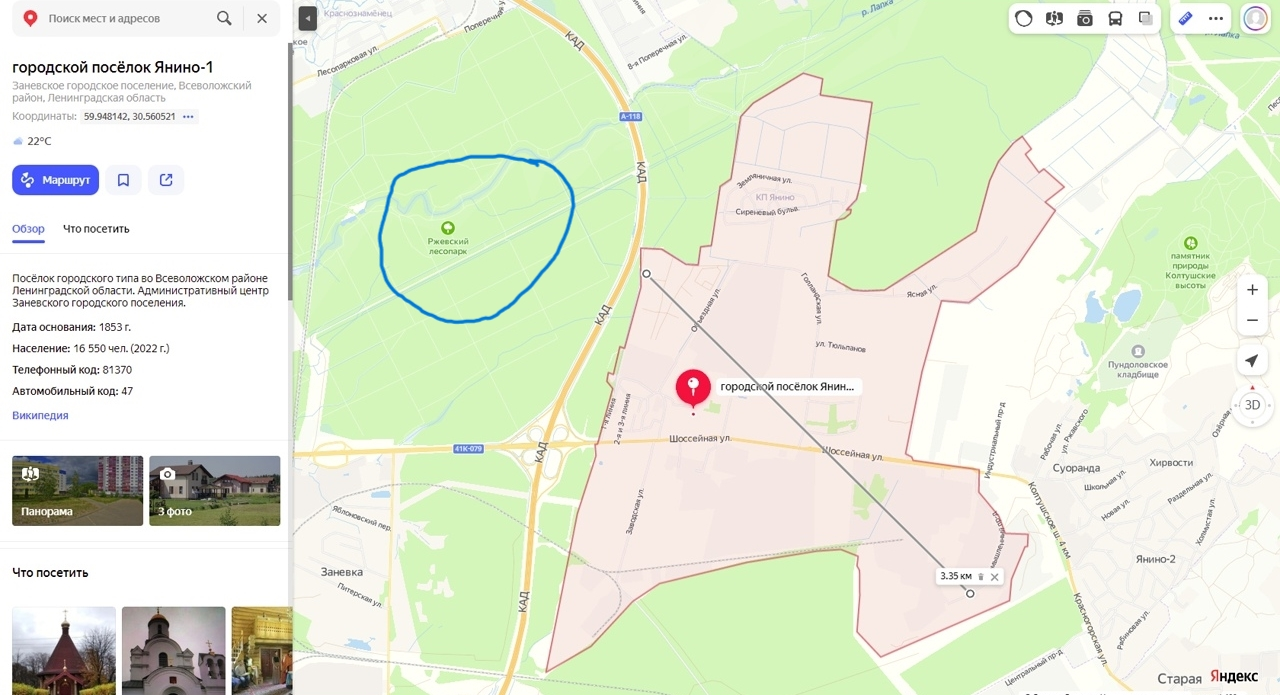

* for the `days_exposition` column, missing values may indicate that the lot has not yet been unloaded from the market at the assumed time of data unloading (maximum date in observations). For such values, you can calculate the delta between the first publication date and the maximum date in observations.

In [13]:
print(f'Estimated database upload day: {df["first_day_exposition"].max()}')

Estimated database upload day: 2019-05-03T00:00:00


* for all other columns characterizing the real estate object should be omitted to avoid distortions in the observations.

### Conclusions

* **in the `is_apartment` column, it is advisable to fill the missing values with nulls;**
* **in the column `balcony` it is advisable to fill the missing values with zeros;**
* **in the `days_exposition` column, it is advisable to fill in the missing values with zeros;**
* **missing values in the columns obtained with the help of the geoinformation system should be left empty, because for many observations the necessary information is initially missing. It is necessary to check the unloading for technical errors or to correct the request to the geoinformation system.;**
* **missing values in columns characterizing observations (height of ceilings, area of rooms, etc.) should also be left blank to avoid bias in the observations. To clarify this information, you can establish connections to systems that have information from the UGRN. This service is paid, but can potentially be monetized for users of the service Yandex.Real Estate by providing all the necessary information about the property.**

## Data pre-processing

Let's fill in the nans in the `is_apartment` and `balcony` columns.

In [14]:
# filling missing values
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)

Before analyzing the dataset, the columns need to be converted to certain data types:
* `last_price` - in integer format, it is unlikely that someone pays pennies
* `first_day_exposition` - in `datetime` format for the possibility of calculating and processing these values
* `balcony` - in integer format, the floor is an integer
* `days_exposition` - integer format
* `rooms` - integer format, the number of rooms is an integer

In [15]:
# converting to datetime format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# filling nans in days_exposition with delta between max time and publication date
df['days_exposition'] = df['days_exposition'].fillna(
    (df['first_day_exposition'].max() - df['first_day_exposition'])
    .astype('timedelta64[D]') # converting to timedelta
    .astype('int')) # converting to int

In [16]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,57.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [17]:
# list with columns for converting to int type
list_int = ['last_price', 'balcony', 'days_exposition', 'rooms']

In [18]:
for column in list_int:
    df[column] = df[column].astype('int')

To check for duplicates, we use the value_counts method to count explicit and implicit values.

In [19]:
# calculating values in each column
for column in df.columns:
     print("\n" + column)
     print(df[column].value_counts())


total_images
10    1798
9     1725
20    1694
8     1585
7     1521
      ... 
31       2
39       1
25       1
42       1
37       1
Name: total_images, Length: 38, dtype: int64

last_price
4500000     342
3500000     291
4000000     260
4300000     260
4200000     259
           ... 
1320000       1
19150000      1
6649000       1
10296437      1
11615600      1
Name: last_price, Length: 2978, dtype: int64

total_area
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

first_day_exposition
2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64

rooms
1     8047
2     7940
3     5814
4     1180
5      326
      ... 
14       2
19       1
16    

Let's check the values in the `locality_name` column for explicit and implicit duplicates.

In [20]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

The column contains duplicates for the urban settlement of Yanino-1 (the letters ё and е are used). Let's replace the values.

In [21]:
df['locality_name'] = df['locality_name'].replace('городской поселок Янино-1', 'городской посёлок Янино-1')

Let's check the number of duplicates in the dataset and remove duplicate values. The reason for duplicate values may be the republication of the property for sale.

In [22]:
print(f' Number of duplicates is: {df.duplicated().sum()}')

 Number of duplicates is: 0


There are no duplicates in the dataset.

### Conclusions

* **in the `is_apartment` and `balcony` columns, missing values are filled with `False` and zeros, respectively;**
* **values in the `last_price`, `balcony` and `days_exposition` columns are converted to the `int` type, the `first_day_exposition` column is converted to the `datetime` format;**
* **duplicates in the `locality_name` column have been replaced for the urban settlement of Yanino-1 (the letters e and f are used), there are no duplicate observations in the dataset.**

## Calculations and adding results to the table

In [23]:
# adding column with the price per square meter
df['price_per_sq'] = (df['last_price'] / df['total_area'] / 1000).astype('int')

In [24]:
# adding columns with a day, month and year of sale
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [25]:
# function that defines three floor categories: first, last, and the other
def floor(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

# applying function
df['floor_cat'] = df.apply(floor, axis=1)

In [26]:
# adding a column defining the ratio of living space to total area
df['liv_total_area'] = df['living_area'] / df['total_area']

In [27]:
# adding a column defining the ratio of kitchen area to total area
df['kitch_total_area'] = df['kitchen_area'] / df['total_area']

In [28]:
# converting of the apartment cost in million rubles with rounding and conversion to integer format
df['price_in_mln'] = (df['last_price'] / 1000000).round(0).astype('int')

In [29]:
df['city_center_km'] = (df['cityCenters_nearest'] / 1000).round(0)

In [30]:
# check
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_sq,day,month,year,floor_cat,liv_total_area,kitch_total_area,price_in_mln,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,57,120,3,3,2019,other,0.472222,0.231481,13,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,81,82,1,12,2018,first,0.460396,0.272277,3,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,558,92,3,8,2015,other,0.612500,0.148214,5,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,424,408,4,7,2015,other,NaN,NaN,65,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121,100,1,6,2018,other,0.320000,0.410000,10,8.0


### Conclusions

* **In the table there was created a column with the cost of the property in thousands of rubles per square meter `price_per_sq` with the purpose of further analysis;**
* **for the dateframe, we created columns with the time of the sale of the apartment: day, month and year of observation;**
* **we have introduced floor categories (depending on the floor on which the apartment is located, there are three categories: the first, the last and the other floor);**
* **we have converted the prices of apartments into millions of rubles and the distance to the center into kilometers;**
* **we have calculated parameters that describe the ratio of the living area to the total area and the kitchen area to the total area of the apartment;** 
* **we have also calculated parameters that describe the ratio of living space to total space.**

## EDA

### Analyzing observations by area, price, number of rooms, ceiling height

Let's analyze the following parameters: area, price, number of rooms, ceiling height. Let's create histograms for these observations.

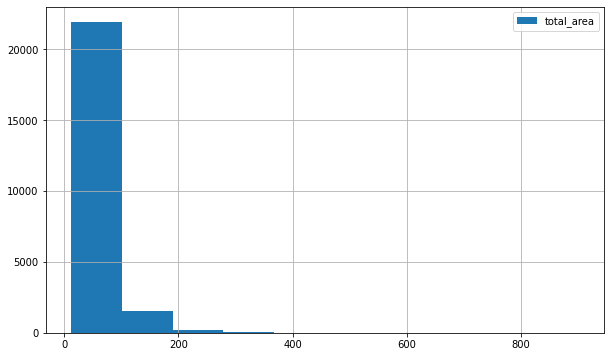

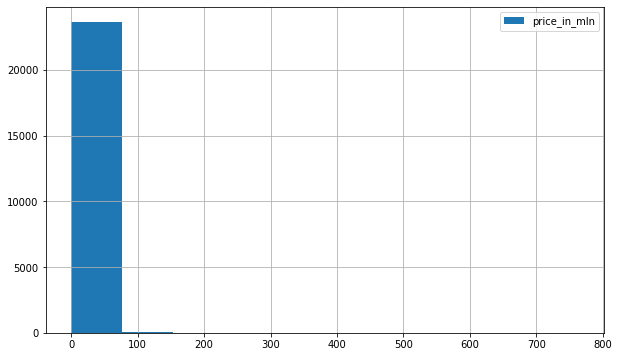

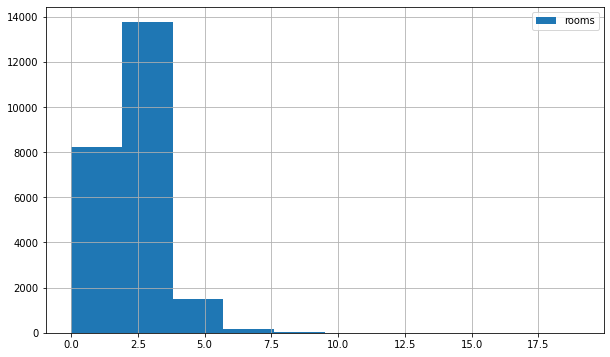

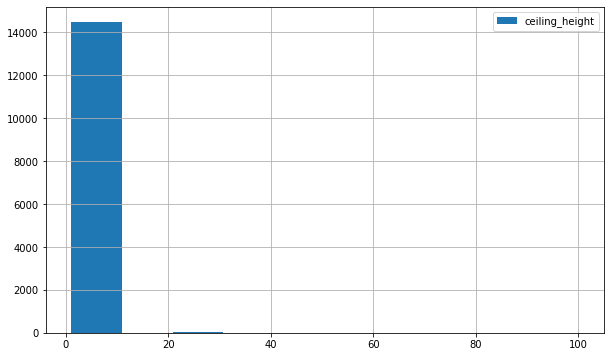

In [31]:
# цикл для построения гистограмм по столбцам в списке
columns = ['total_area', 'price_in_mln', 'rooms', 'ceiling_height']
for column in columns:
    df[column].hist(legend=True, figsize=(10,6))
    plt.show()

* On the basis of the histogram of the distribution of the area of apartments we can note that the majority of observations are concentrated in the range up to 100 square meters, with a significant decrease in the number of observations over 100 square meters. Apartments with the area of more than 200 square meters are rare for St. Petersburg and the Leningrad region. Judging by the range of the x-axis in the data, there are observations over 800 square meters. Thus, it can be assumed that the bulk of apartments are concentrated in the range up to 200 square meters, everything over - is an outlier in the observations (it may be some individual lots of luxury real estate or errors / fraudulent actions in indicating the area of real estate.
* Based on the histogram of the distribution of the cost of apartments, we can note that the majority of real estate objects by value is less than 100 million rubles. At the same time, in the observations there are real estate objects whose value is 0 million rubles, which represents the presence of outliers.
* The histogram by number of rooms shows a concentration of observations in the range of up to 3 rooms. There are also objects without rooms in the observations (outliers).
* The histogram of the distribution of ceiling heights shows a large scatter of values up to 100 meters, which are outliers (a possible error in filling the field around the ceilings). Most of the observations are concentrated in the range up to 10 meters (which is also a very high value).

For a more detailed analysis of the distributions, let's look at the descriptive statistics of these columns.

In [32]:
# looping through columns
for column in columns:
    print(df[column].describe())
    print('\n')

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


count    23699.000000
mean         6.541500
std         10.890454
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        763.000000
Name: price_in_mln, dtype: float64


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64




* It can be seen that 75% of the observations have an area not exceeding 69.9 square meters in the column with the total area of the dwelling. The minimum value is 12 meters, which may indicate that it is a studio apartment. In general, it can be said that the normal distribution for the area of dwellings is the range from 12 square meters to 69.9.
* 75% of the observations are concentrated in the range up to 7 million rubles for the column characterizing the cost of apartments. Taking into account the minimum value of the column, to construct a refining histogram we should take the range of costs greater than 0 and less than or equal to 7 million rubles.
* The number of rooms column shows: most objects have three rooms. Anything with less than one room and more than three is an outlier.
* The presence of outliers also characterizes the column by ceiling height. The normal range is a distribution from 2.52 meters to 2.8 meters.

Considering the highlighted areas, let's take a closer look at the histograms of the distributions.

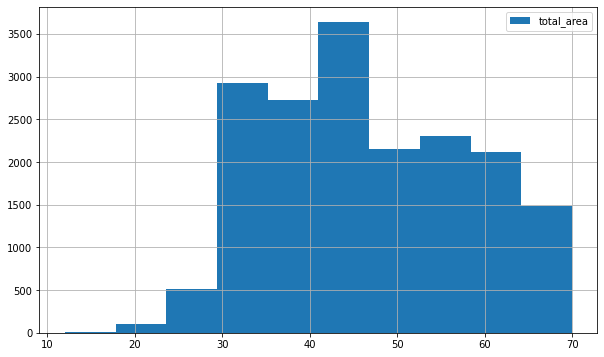

In [33]:
#total area hist
df['total_area'].hist(legend=True, range=(12,70), bins=10, figsize=(10,6));

The character of the distribution is very similar to the normal distribution. The main number of observations is concentrated in the range of 40 to 45 meters, with a small number of objects down to 30 meters.

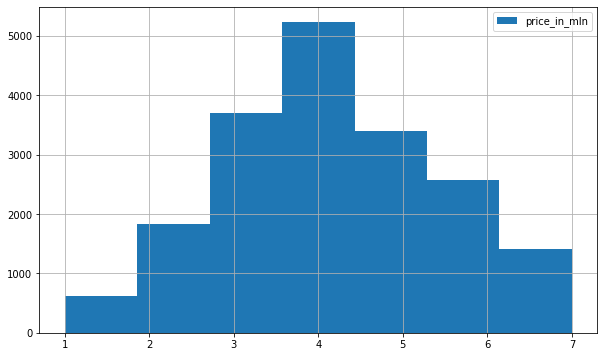

In [34]:
#price hist
(df
 .query('price_in_mln > 0 and price_in_mln <= 7')['price_in_mln']
 .hist(legend=True, bins=7, figsize=(10,6)));

The graph corresponds to a normal distribution. Most of the objects are in the range from 3 to 5 million rubles.

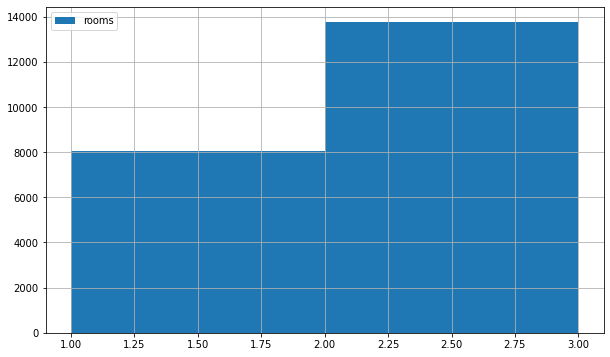

In [35]:
#total rooms hist
df['rooms'].hist(legend=True, range=(1,3),bins=2, figsize=(10,6));

The sales statistics are characterized by a large number of apartments with 2 and 3 rooms.

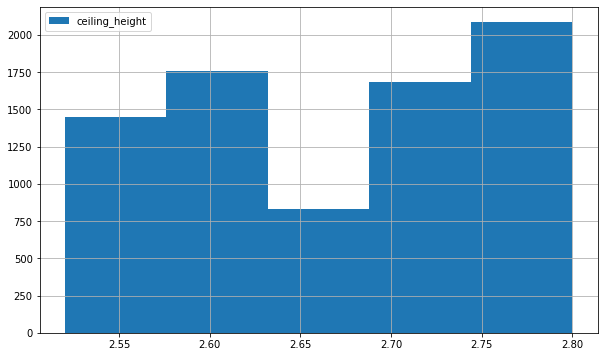

In [36]:
# ceiling height hist
df['ceiling_height'].hist(legend=True, range=(2.52,2.80), bins=5, figsize=(10,6));

The most common objects are apartments with a ceiling height of 2.75 to 2.8 meters.

### Analyzing observations according to when apartments sold

First, let's create a histogram of the observations on the duration of home sales and the descriptive statistics of this column.

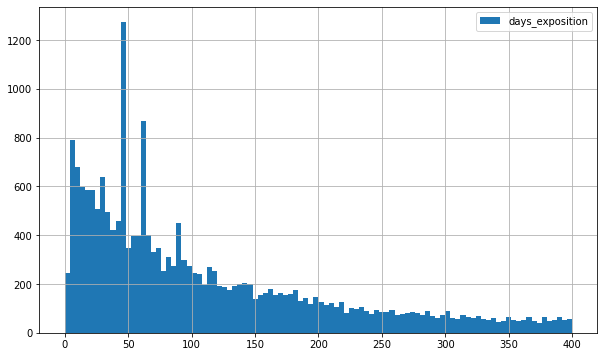

In [37]:
df['days_exposition'].hist(legend=True, bins=100, range=(0, 400), figsize=(10,6));

In [38]:
df['days_exposition'].describe()

count    23699.000000
mean       185.821722
std        233.380877
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

The histogram of the observations is characterized by outliers in the form of values close to zero and a long tail that reaches 1600 days. The sample is characterized by a high dispersion of the values. In general, 0.25 quantile seems to be quite an objective number - 43 days are spent on the sale of the apartment. Values exceeding 0.75 quantile indicate extremely long sales. Perhaps the number of rooms in the property affects the time it takes to sell.
Let's create a histogram of sales days from 0.25 quantile to 0.75.

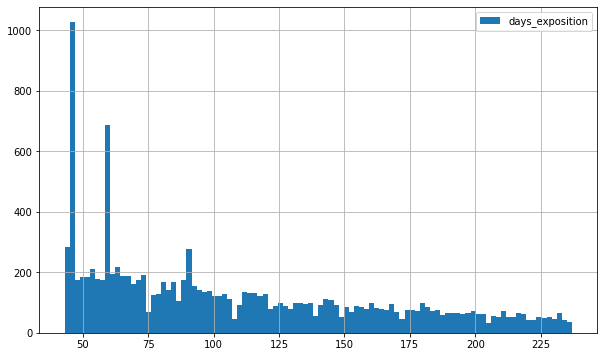

In [39]:
df['days_exposition'].hist(legend=True, bins=100, range=(43,237), figsize=(10,6));

The presented histogram is characterized by a long tail, i.e. in the observations there is a tendency that with increasing number of days the number of objects decreases, but there are non-standard outliers. Let's group the table by the number of days of sale of real estate objects.

In [40]:
# filtering dataframe with 0.25-0.75 quantiles and grouping by the number of days
(df
 .query('days_exposition >= 43 and days_exposition <= 237')
 .groupby('days_exposition')['days_exposition']
 .agg('count')
 .sort_values(ascending=False)
 .head(10))

days_exposition
45    908
60    559
90    204
44    153
43    130
59    127
46    119
54    115
61    114
63    113
Name: days_exposition, dtype: int64

In the histogram, the values for 45, 60 and 90 days stand out. Perhaps these values have something to do with fraudulent real estate sales. Let's create a histogram without these outliers.

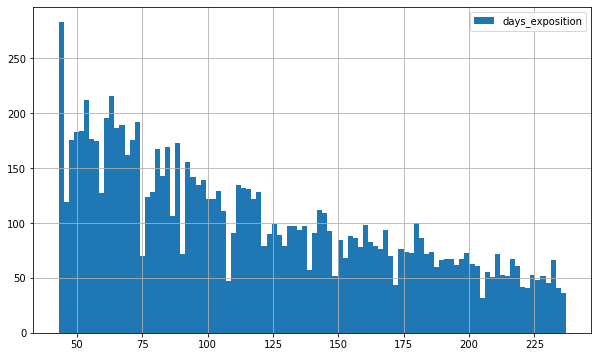

In [41]:
# list with standing out values
wrong_values = [45, 60, 90]
# filtering with quantiles and wrong values
good_df = df.query('days_exposition >= 43 and days_exposition <= 237 and days_exposition not in @wrong_values')
good_df['days_exposition'].hist(legend=True, bins=100, figsize=(10,6));

On the basis of the histogram, it can be concluded that the most common time period for the sale of a property is less than 125 days.

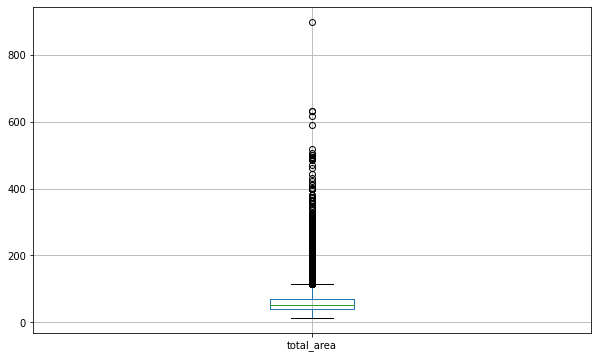

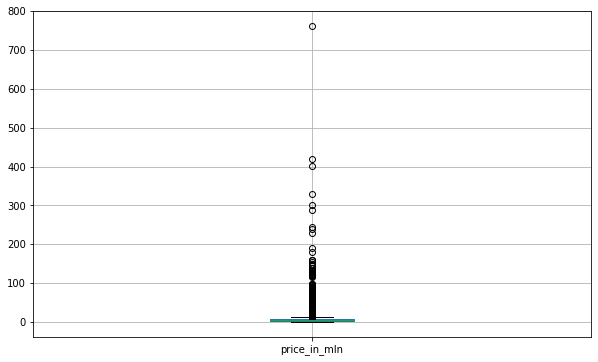

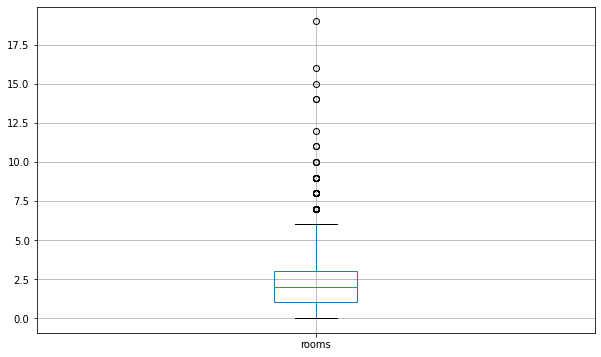

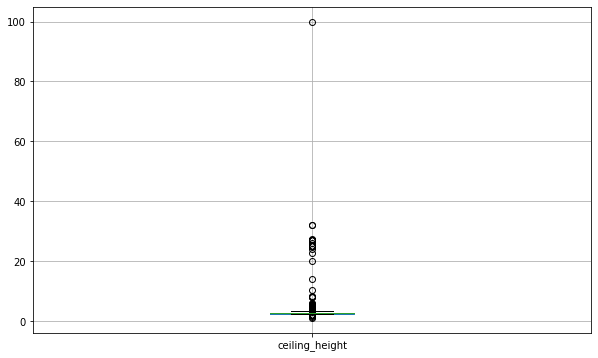

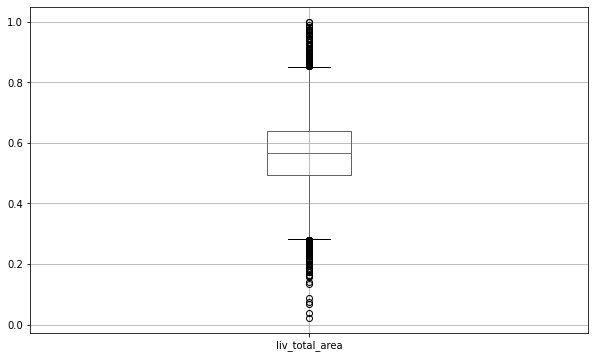

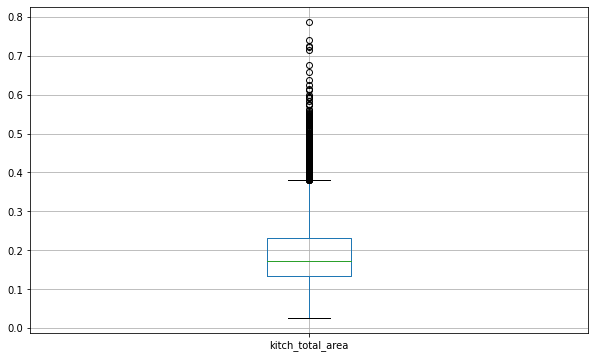

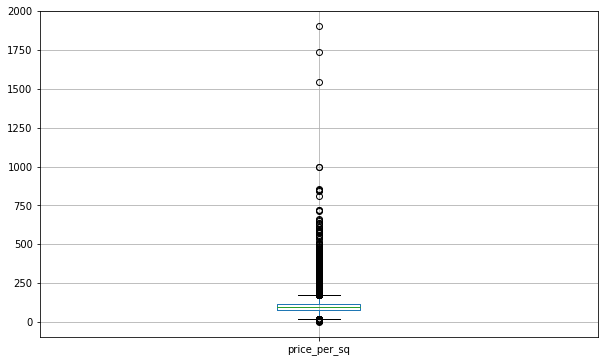

In [42]:
# boxplots loop
numerical_columns = ['total_area', 'price_in_mln', 'rooms', 'ceiling_height', 'liv_total_area', 'kitch_total_area', 'price_per_sq']
for column in numerical_columns:
    df.boxplot(column=column, figsize=(10,6))
    plt.show()

* a very large number of outliers are observed in the columns related to the property area characteristic. Thus, the outliers in the column with the total area of the apartment can affect the calculated columns that reflect the ratios of the areas - living area to total area and kitchen area to total area.;
* a very large number of emissions are also observed in the column with the height of the ceilings. The boxplot is characterized by a very small interquartile range. Based on the previously constructed descriptive statistics for this column, we will look at the distribution from 2.52 meters to 2.8 meters;
* in the column characterizing the number of rooms, the emissions appear the least. The normal distribution is the number of rooms equal to more than 0 and up to ~6 rooms.;
* we will remove the outliers using the columns characterizing the ratio of areas, number of rooms and ceiling heights - so we can potentially remove the outliers in two indices (total area and kitchen area/living area) at once. Thus, for the ratio of kitchen area to total area of the dwelling, values greater than ~0.38 are unrealistically high - that is, about 38% of the dwelling's area is taken up by the kitchen. The normal range for the ratio of living area to total area is ~0.3-0.85. 
* the columns characterizing the value of the apartment are left as they are, since the object of sale may be an elite property.

Let's remove outliers from the observations.

In [43]:
#removing outliers
good_df = df.query('days_exposition >= 43 and days_exposition <= 237 and days_exposition not in @wrong_values and ceiling_height >= 2.52 and ceiling_height <= 2.8 and rooms > 0 and rooms <=6 and kitch_total_area <= 0.38 and liv_total_area >= 0.3 and liv_total_area <=0.85')

### Factor analysis

Let's analyze the dependence of the price on the area, the number of rooms, the distance from the center, the floor on which the apartment is located, the date of the location. For the analysis of numerical variables we will use the correlation value.

In [44]:
good_df[['price_in_mln', 'rooms', 'cityCenters_nearest', 'total_area']].corr()

,price_in_mln,rooms,cityCenters_nearest,total_area
price_in_mln,1.000000,0.512050,-0.236659,0.766535
rooms,0.512050,1.000000,-0.037971,0.808934
cityCenters_nearest,-0.236659,-0.037971,1.000000,-0.058554
total_area,0.766535,0.808934,-0.058554,1.000000


In the observations there is a small linear relationship between the value and the number of rooms, with an increase in the number of rooms - the value increases.

A more pronounced connection is demonstrated between the area of the apartment and its cost, with the increase of the area - the cost of the object increases.

Weak negative correlation is observed between the distance from the city center and the cost of the object - with the increase of the distance from the city center, the cost of the object decreases.

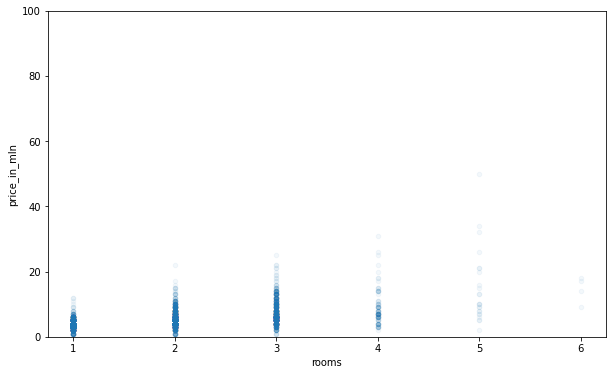

In [45]:
# scatterplot for the number of rooms and price
good_df.plot(x='rooms', y='price_in_mln', kind='scatter', alpha=0.05, ylim=(0,100), figsize=(10,6));

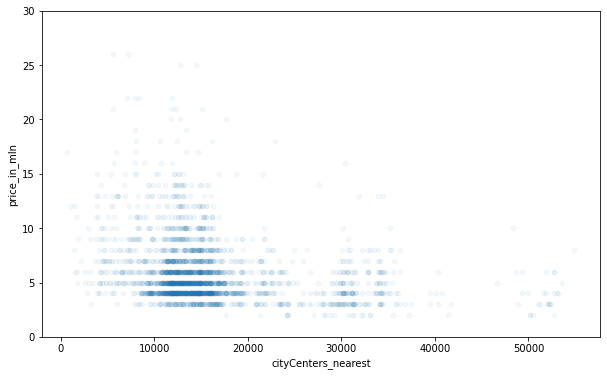

In [46]:
# scatterplot for the center distance and price
good_df.plot(x='cityCenters_nearest', y='price_in_mln', kind='scatter', alpha=0.05, ylim=(0,30), figsize=(10,6));

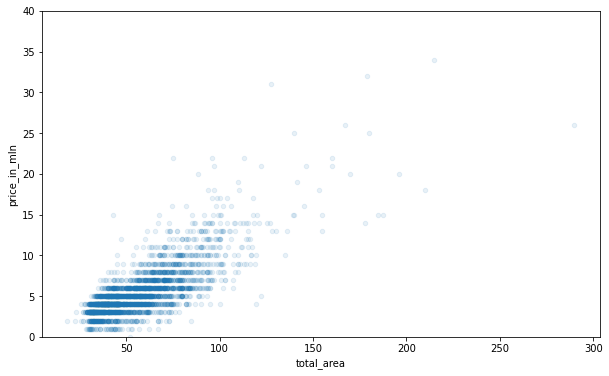

In [47]:
# scatterplot for area and price
good_df.plot(x='total_area', y='price_in_mln', kind='scatter', alpha=0.1, ylim=(0,40), figsize=(10,6));

To analyze the dependence of the price on the floor where the apartment is located, we use a summary table with the calculation of the median value.

In [48]:
# floor categories pivot table
good_df.pivot_table(index='floor_cat', values='price_per_sq', aggfunc=('count', 'mean', 'median'))

,count,mean,median
floor_cat,,,
first,347.0,79.884726,82.0
last,359.0,88.189415,87.0
other,2458.0,99.135883,98.0


From the table we can conclude that the property located on the first floor is cheaper than other categories, the cost of such objects is 82 thousand rubles per square meter.

To analyze the effect of the price of the day of the week, month and year, we also make summary tables.

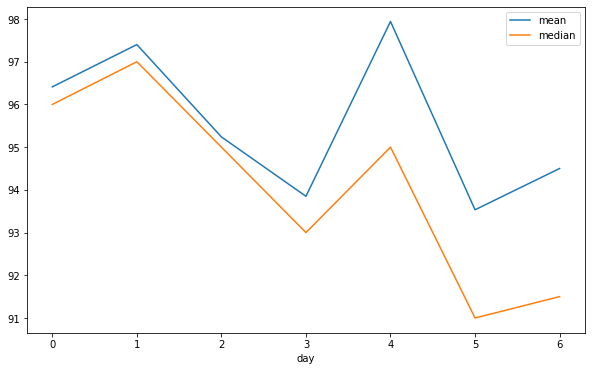

In [49]:
good_df.pivot_table(index='day', values='price_per_sq', aggfunc=('mean', 'median')).plot(figsize=(10,6));

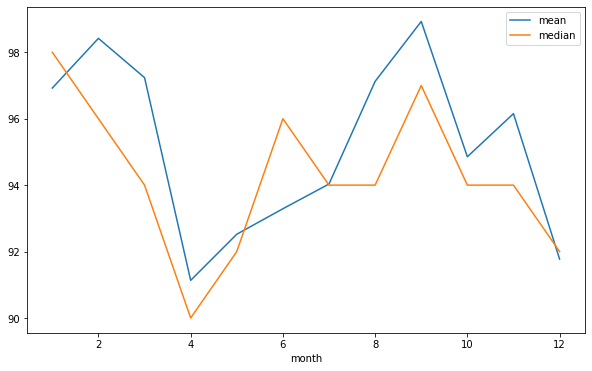

In [50]:
good_df.pivot_table(index='month', values='price_per_sq', aggfunc=('mean', 'median')).plot(figsize=(10,6));

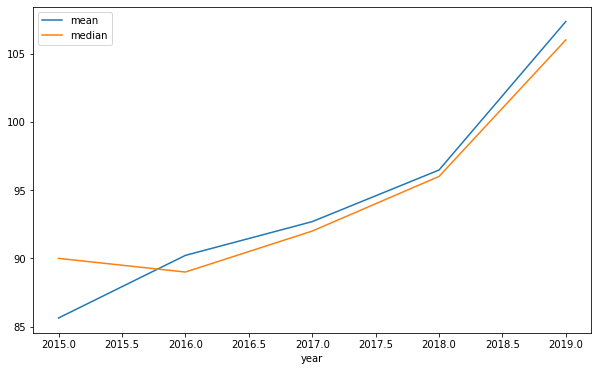

In [51]:
good_df.pivot_table(index='year', values='price_per_sq', aggfunc=('mean', 'median')).plot(figsize=(10,6));

The graphs of the dependence between the price and the day of the week of publication are very interesting, the median and the average value of the cost per square meter change in the same direction.

The average and median values of the price depending on the month of publication behave almost identically - in the summer months the cost decreases, closer to the end of the year - increases. This may indicate a certain seasonality in the volume of supply and demand for real estate.

For the entire observation period, since 2015, the median and average cost per square meter has been steadily increasing.

### Top 10 regions by number of ads

Let's analyze the 10 cities with the most ads.

In [52]:
good_df['locality_name'].value_counts().head(10)

Санкт-Петербург      2137
Всеволожск             96
посёлок Шушары         89
посёлок Мурино         69
посёлок Парголово      51
Колпино                43
Пушкин                 38
Петергоф               38
деревня Кудрово        37
Красное Село           32
Name: locality_name, dtype: int64

In [53]:
# list and df with localities
top_10 = ['Санкт-Петербург', 'Всеволожск', 'посёлок Шушары', 'посёлок Мурино', 'посёлок Парголово', 'Колпино', 'Пушкин', 'Петергоф', 'деревня Кудрово', 'Красное Село']
(good_df
 .query('locality_name in @top_10')
 .pivot_table(index='locality_name', values='price_per_sq', aggfunc='mean')
 .sort_values(by=['price_per_sq'], ascending=False))

,price_per_sq
locality_name,
Санкт-Петербург,107.505381
Пушкин,98.842105
деревня Кудрово,91.351351
посёлок Парголово,88.450980
посёлок Мурино,84.652174
Петергоф,82.789474
посёлок Шушары,78.426966
Колпино,76.604651
Красное Село,71.562500


The highest cost per square meter is in St. Petersburg and is 107 thousand rubles per square meter. The cheapest square meter is in Vsevolozhsk.

### Apartments in the center

To determine the apartments in the center, let's calculate the average price for each kilometer and plot a graph of the effect of price on distance from the center.

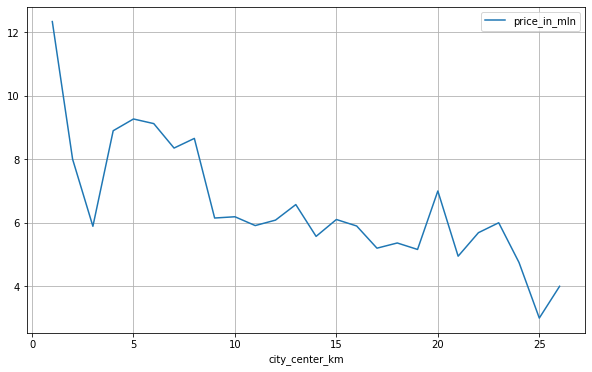

In [54]:
(good_df
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='city_center_km', values='price_in_mln', aggfunc='mean')
 .plot(grid=True, figsize=(10,6)));

Based on the graph, we can assume that the price begins to decrease significantly and steadily, starting from the 5 km mark, which will be the central part of the city.

In [55]:
center_df = good_df.query('locality_name == "Санкт-Петербург" and city_center_km <= 5')
center_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_sq,day,month,year,floor_cat,liv_total_area,kitch_total_area,price_in_mln,city_center_km
323,6,9591727,72.0,2017-06-29,2,2.80,10.0,34.0,9,False,...,118,133,3,6,2017,other,0.472222,0.236111,10,5.0
481,5,6300000,46.5,2018-01-03,1,2.80,5.0,30.0,4,False,...,59,135,2,1,2018,other,0.645161,0.258065,6,5.0
969,10,5350000,41.2,2017-11-09,2,2.80,6.0,27.3,1,False,...,154,129,3,11,2017,first,0.662621,0.182039,5,3.0
1048,5,4990000,40.0,2018-09-25,2,2.70,3.0,25.0,3,False,...,149,124,1,9,2018,last,0.625000,0.165000,5,4.0
1190,17,7200000,67.0,2017-09-05,2,2.75,4.0,27.2,4,False,...,51,107,1,9,2017,last,0.405970,0.176119,7,4.0


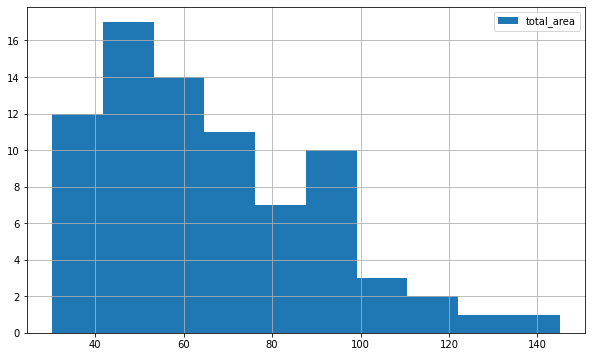

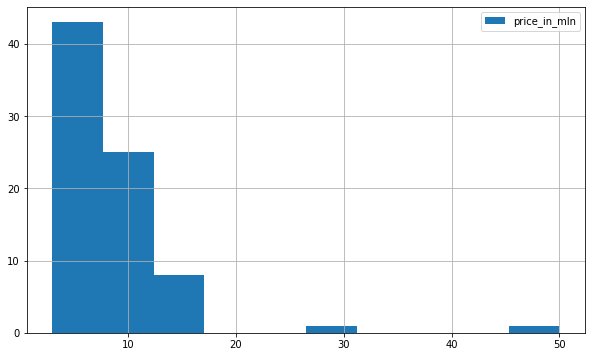

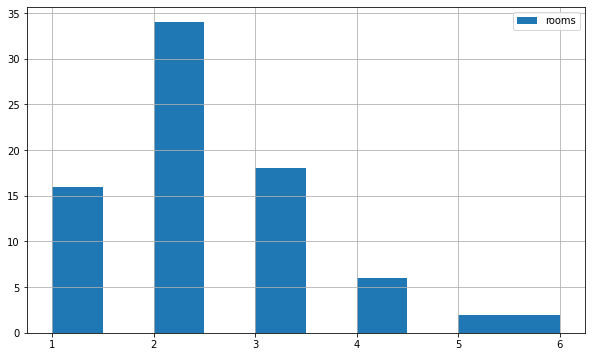

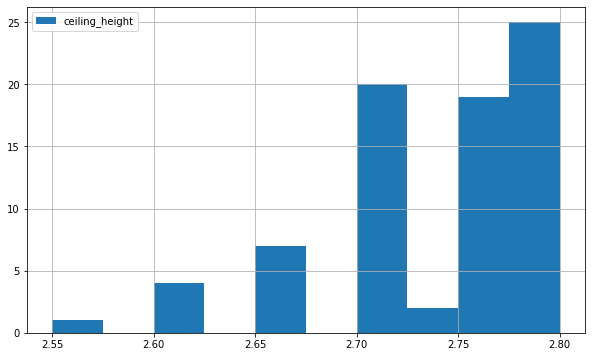

In [56]:
# hist for loop
columns = ['total_area', 'price_in_mln', 'rooms', 'ceiling_height']
for column in columns:
    center_df[column].hist(legend=True, figsize=(10,6))
    plt.show()

In [57]:
# looping through columns
for column in columns:
    print(center_df[column].describe())
    print('\n')

count     78.000000
mean      66.322564
std       24.830993
min       30.300000
25%       46.075000
50%       63.250000
75%       82.300000
max      145.000000
Name: total_area, dtype: float64


count    78.000000
mean      8.743590
std       6.224034
min       3.000000
25%       5.250000
50%       7.000000
75%      10.000000
max      50.000000
Name: price_in_mln, dtype: float64


count    78.000000
mean      2.358974
std       1.127857
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: rooms, dtype: float64


count    78.000000
mean      2.734872
std       0.061025
min       2.550000
25%       2.700000
50%       2.750000
75%       2.800000
max       2.800000
Name: ceiling_height, dtype: float64




* For the column with the total area of the apartment, we can see that 75% of the observations have an area of no more than 82 square meters. The square footage of apartments in the center is slightly higher than in the total base.
* For the column characterizing the cost of housing, we can note an increase in value of about 2 times.
* The column by number of rooms shows that apartments with slightly more rooms are sold in the city center than in the sample as a whole, which is related to the size of the apartments.

In [58]:
center_df[['price_in_mln', 'rooms', 'cityCenters_nearest', 'total_area']].corr()

,price_in_mln,rooms,cityCenters_nearest,total_area
price_in_mln,1.000000,0.503546,-0.023012,0.642256
rooms,0.503546,1.000000,-0.277263,0.805546
cityCenters_nearest,-0.023012,-0.277263,1.000000,-0.113064
total_area,0.642256,0.805546,-0.113064,1.000000


In the observations there is a small linear relationship between the value and the number of rooms, with an increase in the number of rooms - the value increases.

A more pronounced connection is demonstrated between the area of the apartment and its cost, with the increase of the area - the cost of the object increases.

Weak negative correlation is observed between the distance from the city center and the cost of the object - with the increase of the distance from the city center, the cost of the object decreases.

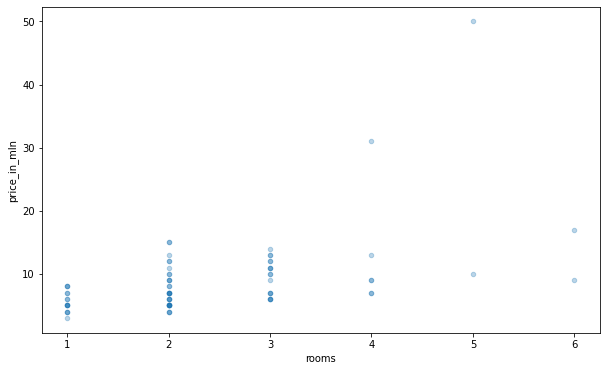

In [59]:
# scatterplot for number of rooms and price
center_df.plot(x='rooms', y='price_in_mln', kind='scatter', alpha=0.3, figsize=(10,6));

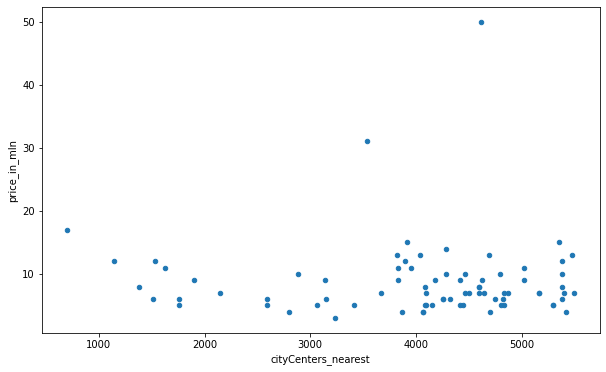

In [60]:
# scatterplot for the center distance and price
center_df.plot(x='cityCenters_nearest', y='price_in_mln', kind='scatter', figsize=(10,6));

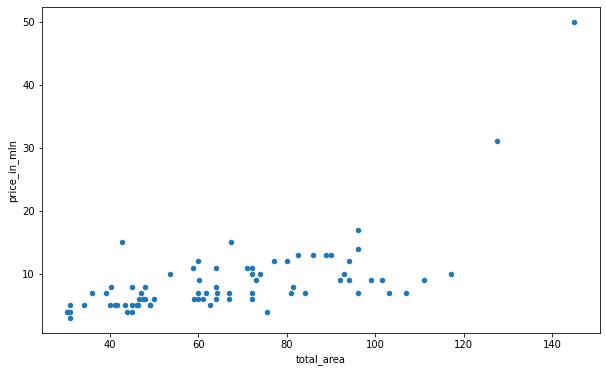

In [61]:
# scatterplot for area and price
center_df.plot(x='total_area', y='price_in_mln', kind='scatter', figsize=(10,6));

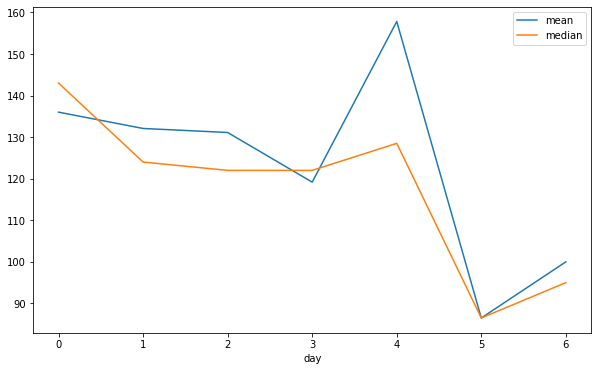

In [62]:
center_df.pivot_table(index='day', values='price_per_sq', aggfunc=('mean', 'median')).plot(figsize=(10,6));

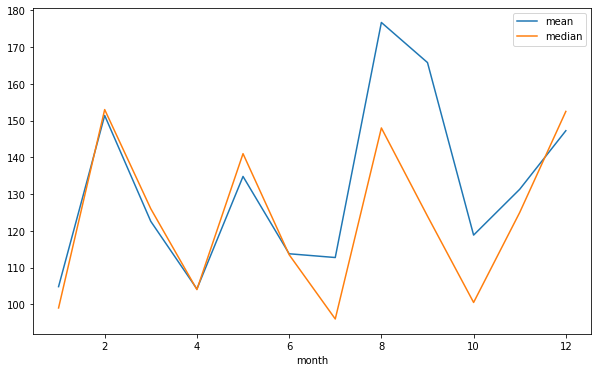

In [63]:
center_df.pivot_table(index='month', values='price_per_sq', aggfunc=('mean', 'median')).plot(figsize=(10,6));

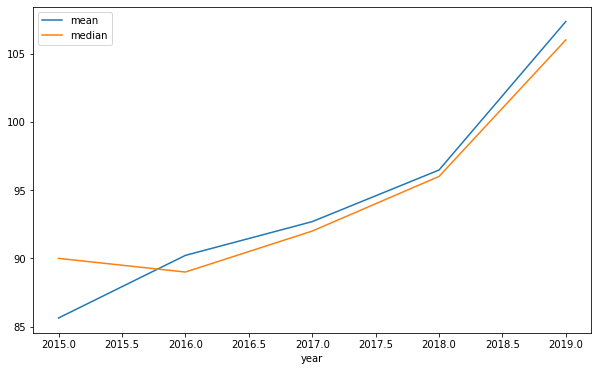

In [64]:
good_df.pivot_table(index='year', values='price_per_sq', aggfunc=('mean', 'median')).plot(figsize=(10,6));

### Conclusions

* **Observations on the time of sale of apartments are characterized by outliers in the form of values close to zero and a long tail reaching 1600 days. On the whole, the 0.25-quantile seems to be a sufficient objective number - 43 days are spent for the sale of the apartment. Values exceeding 0.75 quantile indicate extremely long sales. Probably, the duration of sales is influenced by the number of rooms of the real estate object. At the same time, the values for 45, 60 and 90 days stand out strongly in the observations.**
* **A sample of apartments in the center showed that the properties represented in this area generally have a slightly larger area and number of rooms than the distribution of the observation data on the total base.**
* **The number of rooms and the area of the dwelling affect the total sample and the central sample equally. As the area and number of rooms increase, the value of the object increases.**
* **The distance to the center has less impact on the cost of apartments located in the center, which seems logical since these objects are located in the same area.**
* **The cost per square meter of apartments in both the general sample and the center has been steadily increasing since 2015. At the end of the week, the cost per square meter in the general sample and the sample in the center increases. This may have something to do with user behavior - for example, people are more likely to look at properties closer to the end of the week. Property sellers may be aware of this and raise the price of the property slightly as a result. The dependence of the price on the month in the central sample has a slightly different seasonality than in the general base sample.**

## Summary

* **The study analyzed an archive of advertisements for apartments for sale in St. Petersburg and neighboring communities for the period from 2015 to 2019.**
* **The analysis of missing values in the data set indicated possible technical errors / improperly formed queries to the database when unloading data from the geoinformation system. 
The rest of the missing values not filled in by Yandex.Real Estate users may be resolved by connecting the advertising base to systems having information from the Unified State Register of Real Estate. Although this service is paid, it can be monetized for users of Yandex.Real Estate by providing all the necessary information about the real estate object. This issue should be worked out additionally.**
* **In order to build an automated system for tracking fraudulent activity, the outliers in the data set under consideration were analyzed. Among the variables of potential interest is the time of sale of the apartments - most of the objects are sold no earlier than 43 days and no later than 237 days. Among these objects, values of 45, 60 and 90 days stand out unusually. Perhaps these values are somehow connected with fraudulent sale of real estate. In addition, we should note such indicators as the ratio of living area to total area and kitchen area to total area of the apartment. For example, for the ratio of kitchen area to total area, values above ~0.38 are unrealistically high - that is, about 38% of the area of the apartment is related to the kitchen. The normal range for the ratio of living space to gross floor area is ~0.3-0.85. Ceiling heights greater than three meters also seem to be likely outliers. Any values outside of these ranges may also indicate fraudulent activity on properties. Such properties may need to be manually moderated with a site visit to verify their characteristics.** 
* **The price of apartments in the general base and the sample in the center is influenced by the same factors - the area and the number of rooms in the apartment. As the number of rooms increases, the price of the apartment increases. At the same time, the area of apartments in the center is slightly larger than the area of objects outside the center. The dependence of the price on the area of the object confirms the theory that in order to determine the fraudulent activity one should identify the anomalous proportions of the area of the real estate object.**
* **For the whole sample, the distance from the center has a more pronounced influence on the cost of the apartment. While in the central part, the cost changes insignificantly when moving away from the center. Over time, there is an increase in the cost per square meter of the observed objects (from 2015 to 2019).**